# EDA(using WholeSale dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/wholesale.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Basic Information & Overview 
print("Shape of dataset: ",df.shape)
print("\n Data Info:\n" )
df.info()


Shape of dataset:  (440, 8)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
# Missing values analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/ len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)


,missing_count,missing_percent
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


In [11]:
# 4. Handling Missing Values

# Fill numeric missing values with mean
df['Milk'] = df['Milk'].fillna(df['Milk'].mean())

# Fill categorical missing values with mode
df['Fresh'] = df['Fresh'].fillna(df['Fresh'].mode()[0])

# Drop 'deck' column only if it exists
df.drop(columns=['Region'], inplace=True, errors='ignore')

print("Missing values after cleaning: \n", df.isnull().sum().sum())


Missing values after cleaning: 
 0


In [12]:
# Missing values analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/ len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)


,missing_count,missing_percent
Channel,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


In [13]:
#Duplicates & Data type Check
print("Duplicate rows: ", df.duplicated().sum())

# Convert some columns to category type 

df['Grocery']=df['Grocery'].astype('category')
df['Frozen']=df['Frozen'].astype('category')
df['Channel']=df['Channel'].astype('category')

df.info()


Duplicate rows:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Fresh             440 non-null    int64   
 2   Milk              440 non-null    int64   
 3   Grocery           440 non-null    category
 4   Frozen            440 non-null    category
 5   Detergents_Paper  440 non-null    int64   
 6   Delicassen        440 non-null    int64   
dtypes: category(3), int64(4)
memory usage: 55.2 KB


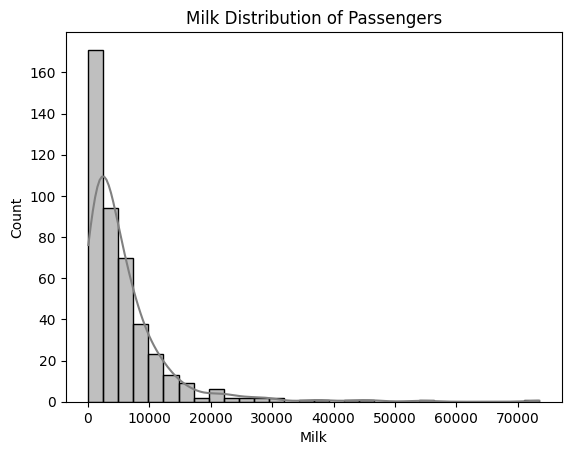

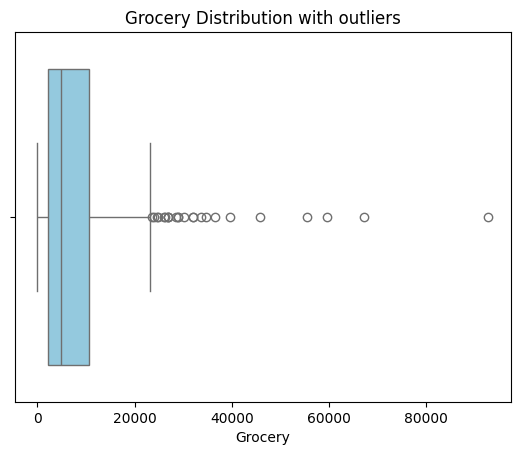

In [15]:
# 6. Univariate analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()
# Histogram : Age
sns.histplot(df['Milk'],bins=30,kde=True,color='gray')
plt.title("Milk Distribution of Passengers")
plt.show()
# Boxplot :Fare
sns.boxplot(x=df['Grocery'],color='skyblue')
plt.title("Grocery Distribution with outliers")
plt.show()

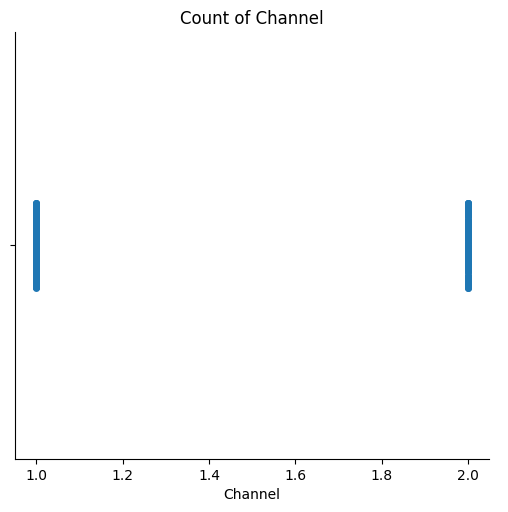

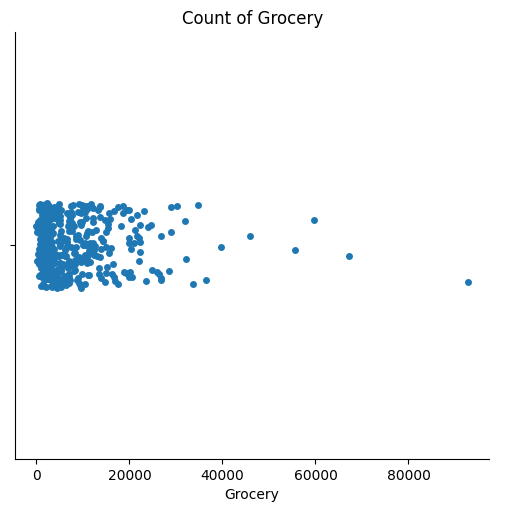

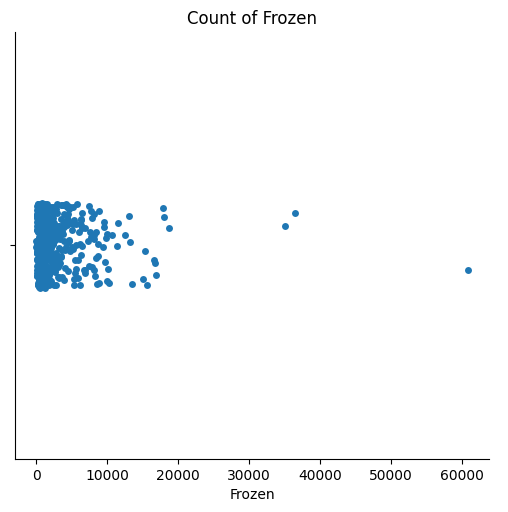

In [17]:
# Univariate Analysis - categorical features

cat_cols = df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

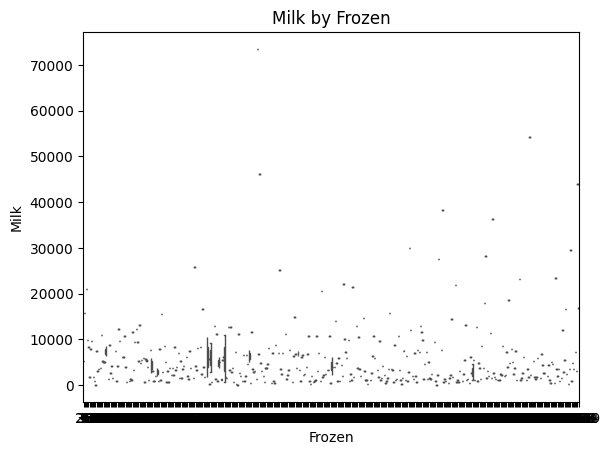

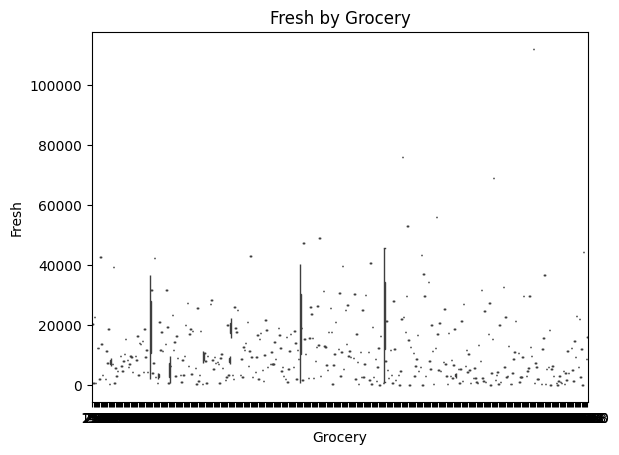

In [18]:
# Bivariate analysis - Numerical vs categorical 

sns.boxplot(x='Frozen',y='Milk',data=df,color='gray')
plt.title("Milk by Frozen")
plt.show()
sns.boxplot(x='Grocery',y='Fresh',data=df)
plt.title("Fresh by Grocery")
plt.show()

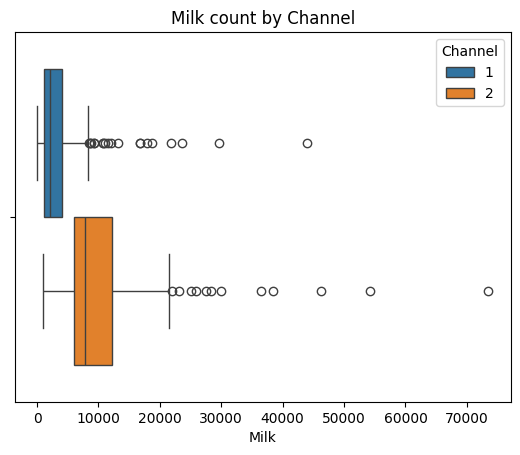

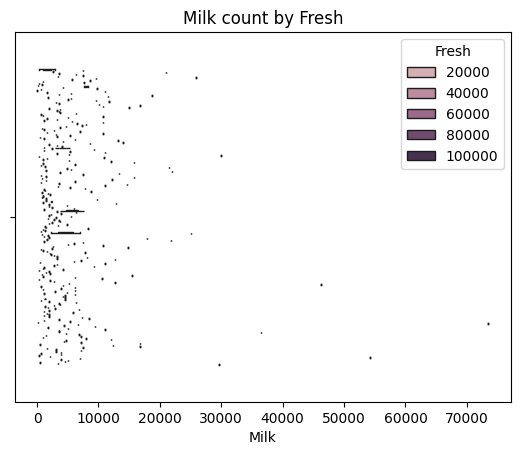

In [19]:
# Bivariate analysis - Categorical vs categorical 

sns.boxplot(x='Milk',hue='Channel',data=df)
plt.title("Milk count by Channel")
plt.show()
sns.boxplot(x='Milk',hue='Fresh',data=df)
plt.title("Milk count by Fresh")
plt.show()

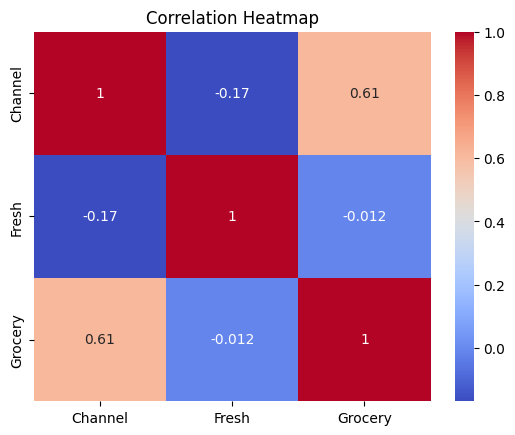

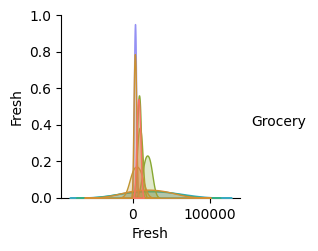

In [23]:
# Correlation and multivariate analysis

corr=df[['Channel','Fresh','Grocery']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Channel','Fresh','Grocery']],hue='Grocery')
plt.show()

Number of outliers in Fresh: 20


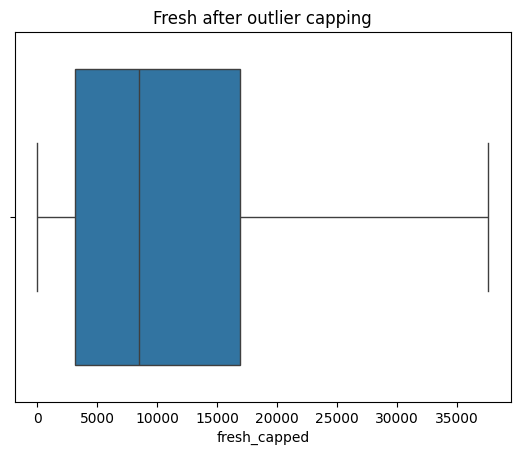

In [24]:
# Outlier detection using IQR 
Q1 = df['Fresh'].quantile(0.25)
Q3 = df['Fresh'].quantile(0.75)
IQR = Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=df[(df['Fresh']<lower) | (df['Fresh']>upper)]
print("Number of outliers in Fresh:",len(outliers))

# outliers
df['fresh_capped']=df['Fresh'].clip(lower,upper)
sns.boxplot(x=df['fresh_capped'])
plt.title("Fresh after outlier capping")
plt.show()

In [26]:
# Export the cleaned data
df.to_csv("wholesale_cleaned.csv",index=False)
print("\n Cleaned wholesale data saved as wholesale_cleaned.csv")


 Cleaned wholesale data saved as wholesale_cleaned.csv


In [27]:
import os
print(os.getcwd())

c:\Users\Varsha\OneDrive\Desktop\Data Analysis
